In [1]:
import json

books = json.load(open("output/reviewsSkoob.json"))

In [2]:
total_books = len(books)
total_books

81724

In [3]:
total_reviews = sum([len(book['reviews']) for book in books])
total_reviews

640644

In [4]:
import itertools

reviews = list(itertools.chain.from_iterable([review for review in [book['reviews'] for book in books]]))
review_authors = set([review['user_id'] for review in reviews])

len(review_authors)

108882

In [5]:
import pandas as pd

df_reviews = pd.DataFrame(reviews)
#df_reviews.groupby(['rating'])

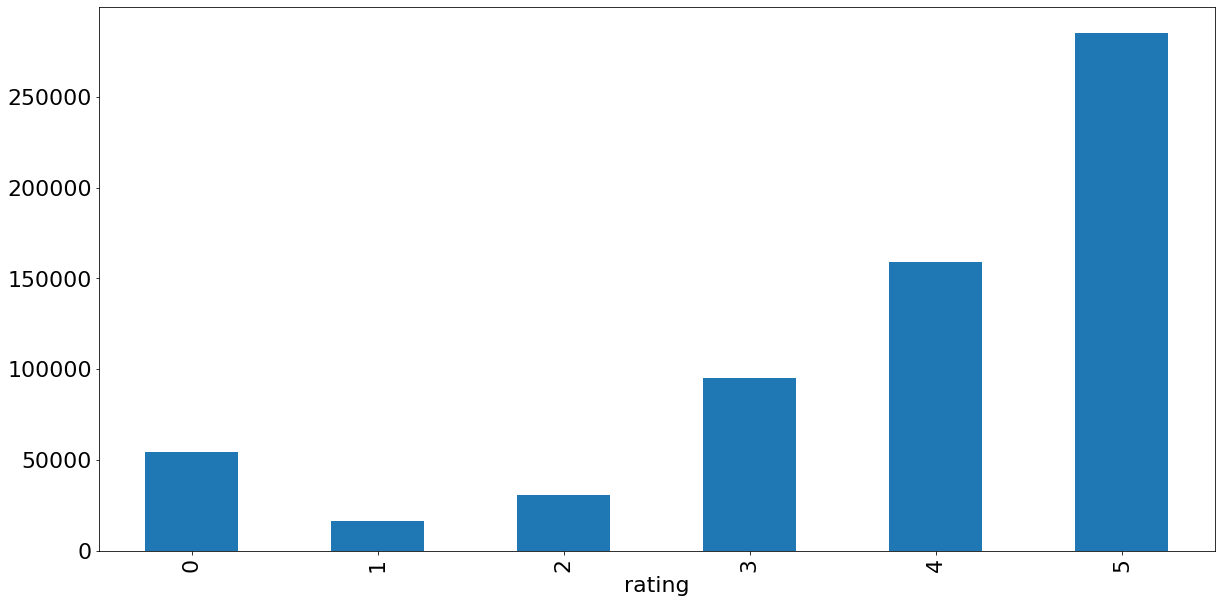

In [19]:
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
df_reviews.groupby(['rating']).count()['user_id'].plot.bar()

In [24]:
reviews_by_rating = df_reviews.groupby(['rating']).count()['user_id']
reviews_by_rating  / reviews_by_rating.sum()

rating
0    0.084871
1    0.025349
2    0.047981
3    0.148195
4    0.248350
5    0.445254
Name: user_id, dtype: float64

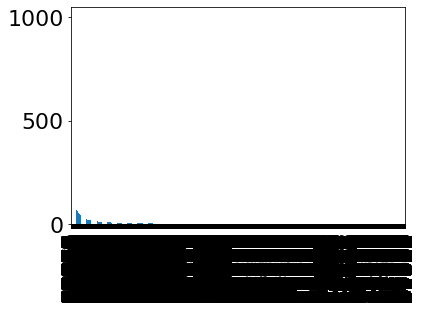

In [36]:
df_reviews_by_book = pd.DataFrame([(len(book['reviews']), book['book_name']) for book in books], columns=['qtd_reviews', 'livro'])
df_reviews_by_book.sort_values(by=['qtd_reviews'], ascending=False)['qtd_reviews'].plot.bar()